# Clase 5 - Regresion
![picture](https://drive.google.com/uc?id=1Ar6KpqlsLxcLlnOrXPx6QZejStP6bV9P)

## Pre requisitos

Se actualiza fastai descargando y ejecutando el script *colab*

In [1]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


Dar permiso para acceder a mi Drive

In [0]:
#from google.colab import drive
#drive.mount('/content/drive')

Nos aseguramos que cualquier cambio en una librería es recargado automáticamente y que que cualquier gráfica o imagen se muestre aquí

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Importamos las librerías necesarias

In [0]:
from fastai.vision import *

## Curso 5 - Regresion

### Descarga del dataset

Descargamos el dataset [BIWI head pose dataset](https://data.vision.ee.ethz.ch/cvl/gfanelli/head_pose/head_forest.html#db).

In [5]:
path = untar_data(URLs.BIWI_HEAD_POSE)
path.ls()

[PosixPath('/root/.fastai/data/biwi_head_pose/12'),
 PosixPath('/root/.fastai/data/biwi_head_pose/03.obj'),
 PosixPath('/root/.fastai/data/biwi_head_pose/15.obj'),
 PosixPath('/root/.fastai/data/biwi_head_pose/07'),
 PosixPath('/root/.fastai/data/biwi_head_pose/21'),
 PosixPath('/root/.fastai/data/biwi_head_pose/16'),
 PosixPath('/root/.fastai/data/biwi_head_pose/19'),
 PosixPath('/root/.fastai/data/biwi_head_pose/24'),
 PosixPath('/root/.fastai/data/biwi_head_pose/05'),
 PosixPath('/root/.fastai/data/biwi_head_pose/07.obj'),
 PosixPath('/root/.fastai/data/biwi_head_pose/20'),
 PosixPath('/root/.fastai/data/biwi_head_pose/14.obj'),
 PosixPath('/root/.fastai/data/biwi_head_pose/16.obj'),
 PosixPath('/root/.fastai/data/biwi_head_pose/06'),
 PosixPath('/root/.fastai/data/biwi_head_pose/02'),
 PosixPath('/root/.fastai/data/biwi_head_pose/08'),
 PosixPath('/root/.fastai/data/biwi_head_pose/12.obj'),
 PosixPath('/root/.fastai/data/biwi_head_pose/04'),
 PosixPath('/root/.fastai/data/biwi_head

Como `path.ls()` no devuelve el contenido ordenado, lo vemos de otra manera

In [6]:
!ls /content/data/biwi_head_pose

01	04	07	10	13	16	19	22	io_sample.cpp
01.obj	04.obj	07.obj	10.obj	13.obj	16.obj	19.obj	22.obj	readme.txt
02	05	08	11	14	17	20	23
02.obj	05.obj	08.obj	11.obj	14.obj	17.obj	20.obj	23.obj
03	06	09	12	15	18	21	24
03.obj	06.obj	09.obj	12.obj	15.obj	18.obj	21.obj	24.obj


Leamos el `readme.txt` para ver cómo son los datos

In [7]:
!cat /content/data/biwi_head_pose/readme.txt

Biwi Kinect Head Pose Database

This database is made available for non-commercial use such as university research and education.

We kindly ask you to cite the following reference in your publications related to this work:

@article{fanelli_IJCV,
  author = {Fanelli, Gabriele and Dantone, Matthias and Gall, Juergen and Fossati, Andrea and Van Gool, Luc},
  title = {Random Forests for Real Time 3D Face Analysis},
  journal = {Int. J. Comput. Vision},
  year = {2013},
  month = {February},
  volume = {101},
  number = {3},
  pages = {437--458}
}

The database contains 24 sequences acquired with a Kinect sensor. 20 people (some were recorded twice - 6 women and 14 men) were recorded while turning their heads, sitting in front of the sensor, at roughly one meter of distance.

For each sequence, the corresponding .obj file represents a head template deformed to match the neutral face of that specific person.
In each folder, two .cal files contain calibration information for the depth and t

Vemos que cada carpeta contiene las imágenes de una persona, veamos una de las carpetas a ver

In [8]:
!ls /content/data/biwi_head_pose/01

depth.cal	      frame_00169_rgb.jpg   frame_00336_rgb.jpg
frame_00003_pose.txt  frame_00170_pose.txt  frame_00337_pose.txt
frame_00003_rgb.jpg   frame_00170_rgb.jpg   frame_00337_rgb.jpg
frame_00004_pose.txt  frame_00171_pose.txt  frame_00338_pose.txt
frame_00004_rgb.jpg   frame_00171_rgb.jpg   frame_00338_rgb.jpg
frame_00005_pose.txt  frame_00172_pose.txt  frame_00339_pose.txt
frame_00005_rgb.jpg   frame_00172_rgb.jpg   frame_00339_rgb.jpg
frame_00006_pose.txt  frame_00173_pose.txt  frame_00340_pose.txt
frame_00006_rgb.jpg   frame_00173_rgb.jpg   frame_00340_rgb.jpg
frame_00007_pose.txt  frame_00174_pose.txt  frame_00341_pose.txt
frame_00007_rgb.jpg   frame_00174_rgb.jpg   frame_00341_rgb.jpg
frame_00008_pose.txt  frame_00175_pose.txt  frame_00342_pose.txt
frame_00008_rgb.jpg   frame_00175_rgb.jpg   frame_00342_rgb.jpg
frame_00009_pose.txt  frame_00176_pose.txt  frame_00343_pose.txt
frame_00009_rgb.jpg   frame_00176_rgb.jpg   frame_00343_rgb.jpg
frame_00010_pose.txt  frame_00177_pose.

Vemos tres tipos de archivo:


*   `<name>_pose.txt`: Contiene la posición del centro de la cara
*   `<name>_rgb.jpg`: Contiene la foto
*   `rgb.cal`: Contiene la calibración de la cámara



Veamos cómo es el archivo de calibración

In [9]:
!cat /content/data/biwi_head_pose/01/rgb.cal

517.679 0 320 
0 517.679 240.5 
0 0 1 

0 0 0 0 

0.999947 0.00432361 0.00929419 
-0.00446314 0.999877 0.0150443 
-0.009228 -0.015085 0.999844 

-24.0198 5.8896 -13.2308 

640 480


Obtenemos la matriz de calibración descartando las 6 últimas líneas

In [10]:
calibration = np.genfromtxt(path/'01'/'rgb.cal', skip_footer=6); calibration

array([[517.679,   0.   , 320.   ],
       [  0.   , 517.679, 240.5  ],
       [  0.   ,   0.   ,   1.   ]])

Veamos ahora cómo son las imágenes y los archivos con la posición de los centros de las caras

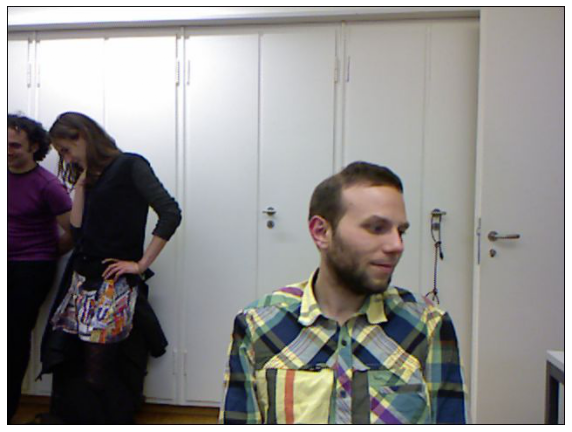

In [11]:
fname = '09/frame_00667_rgb.jpg'
img = open_image(path/fname)
img.show(figsize=(10, 10))

Como los nombres de los archivos con las posiciones del centro de la cara tienen el mismo nombre que la imagen, solo que terminado en `_pose.txt` en vez de `_rgb.jpg`. De modo que creamos una función para obtener el nombre del archivo

In [0]:
# Se cambia el rgb.jpg final por pose.txt
def img2txt_name(f): return path/f'{str(f)[:-7]}pose.txt'

In [13]:
txt_file = img2txt_name(fname)
!cat {str(txt_file)}

0.804344 -0.193884 -0.56164 
0.145617 0.98076 -0.130024 
0.576043 0.0227998 0.817101 

187.332 40.3892 893.135 



Para el centro del punto nos vale solo con los tres últimos números, por lo que lo obtenemos descartando las 3 primeras filas

In [14]:
center = np.genfromtxt(img2txt_name(fname), skip_header=3); center

array([187.332 ,  40.3892, 893.135 ])

Por último creamos una función para obtener la posición del centro de la cara en la imagen a través del centro obtenido del `.txt` y de la matriz de calibración.

In [0]:
def convert_biwi(coords):
    c1 = coords[0] * calibration[0][0]/coords[2] + calibration[0][2]
    c2 = coords[1] * calibration[1][1]/coords[2] + calibration[1][2]
    return tensor([c2,c1])

def get_ctr(f):
    ctr = np.genfromtxt(img2txt_name(f), skip_header=3)
    return convert_biwi(ctr)

def get_ip(img,pts): return ImagePoints(FlowField(img.size, pts), scale=True)

Calculamos la posición del centro de la cara de la imagen de prueba y lo representamos

In [16]:
get_ctr(fname)

tensor([263.9104, 428.5814], dtype=torch.float64)

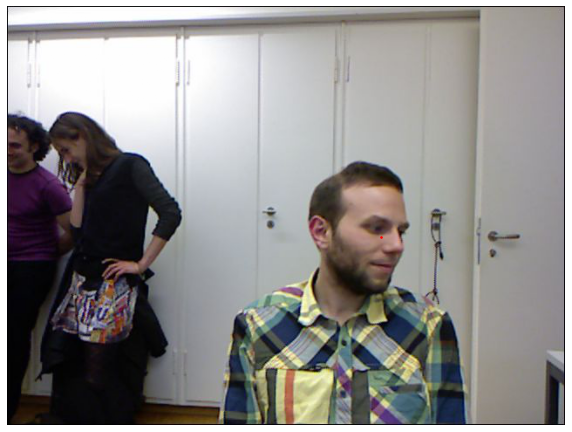

In [17]:
ctr = get_ctr(fname)
img.show(y=get_ip(img, ctr), figsize=(10, 10))

### Se crea el dataset

Se crea el data set:


*   Se usa la carpeta `13` como datos de validación
*   En las trasnformaciones de las imágenes, si se voltea la imagen, se voltea también la posición del punto



In [0]:
'''data = (PointsItemList.from_folder(path)
        .split_by_valid_func(lambda o: o.parent.name=='13')
        .label_from_func(get_ctr)
        .transform(get_transforms(), tfm_y=True, size=(120,160))
        .databunch().normalize(imagenet_stats)
       )'''
data = (PointsItemList.from_folder(path)
        .split_by_valid_func(lambda o: o.parent.name=='13')
        .label_from_func(get_ctr)
        #.transform(get_transforms(), tfm_y=True, size=(120,160))
        .databunch().normalize(imagenet_stats)
       )

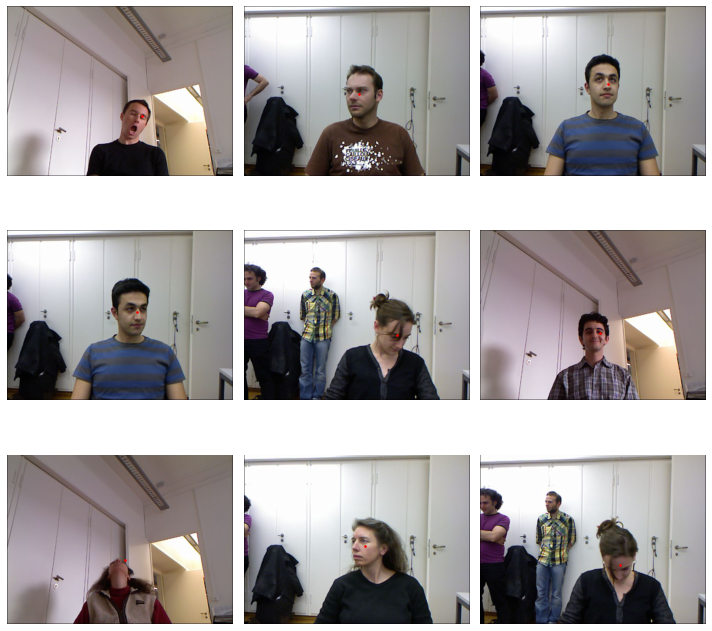

In [19]:
data.show_batch(3, figsize=(10,10))

### Se crea el modelo

Se crea el modelo

In [20]:
learn = cnn_learner(data, models.resnet34)
learn.loss_func = MSELossFlat()

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


### Entrenamiento

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


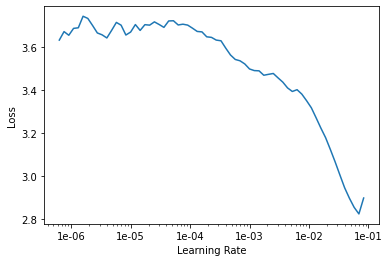

In [21]:
learn.lr_find()
learn.recorder.plot()

In [0]:
lr = 2e-2

In [23]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,time
0,0.097104,0.030398,04:59
1,0.027415,0.004113,04:57
2,0.007204,0.001264,04:57
3,0.002995,0.001099,04:57
4,0.001657,0.001250,04:58


In [0]:
learn.save('stage-1')

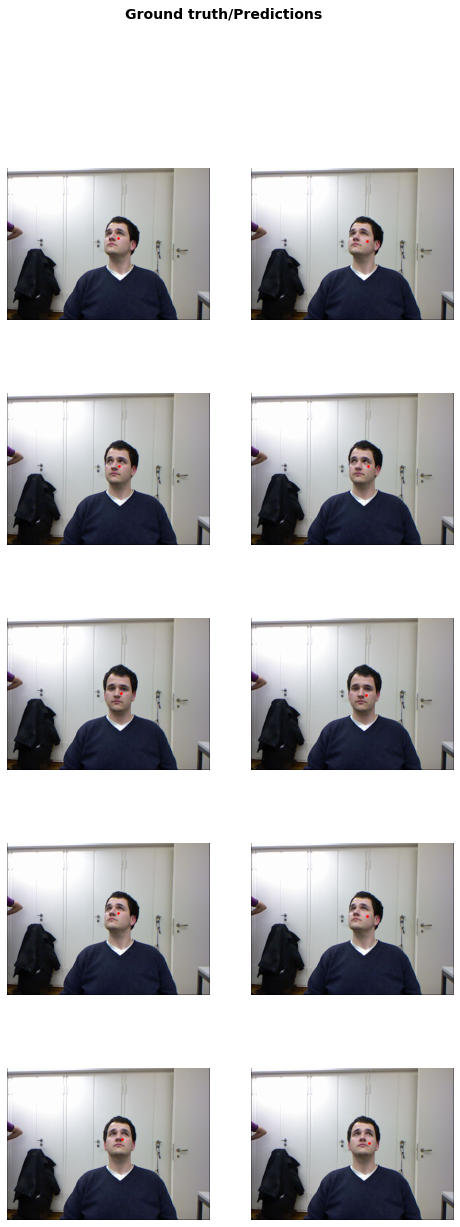

In [25]:
learn.show_results()

In [26]:
print('fin')

fin
